In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [55]:
data_path = '/Users/annabelladrewanowski/Documents/UZH/Masterarbeit/Analysis/SQUID/'
name = 'Reference/STO/STO_MH_2K_FC_1T.csv'
df = pd.read_csv(data_path+name)
df1 = df.drop(df.loc[:, 'Transport Action': 'Map 16'], axis = 1)
df.head()
df1.columns = ['comment', 'Time', 'Temperature', 'Magnetic_field', 'Moment', 'Std_err']
df2 = df1.drop(['comment'], axis = 1)



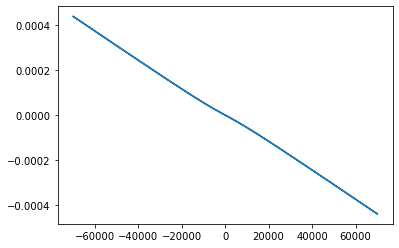

In [51]:

plt.plot(df2.Magnetic_field, df2.Moment)
plt.show()

In [43]:
def linear(x, a, b):
    return a * x + b

In [49]:
def linear_background_fit(df):
    x_range = df.Magnetic_field.to_numpy()
    y_range = df.Moment.to_numpy()
    a_guess = (y_range[-1]-y_range[0])/np.abs(x_range[-1]-x_range[0])
    p0 = np.array([a_guess, 0.1])
    popt, pcov = curve_fit(linear, x_range, y_range, p0)
    # evaluate linear function with parameters from fit
    linear_background_function = linear(x_range, *popt)
    plt.plot(x_range, linear_background_function)
    plt.show()
    return linear_background_function

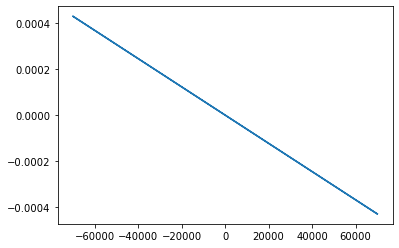

array([-4.29336757e-04, -3.98668344e-04, -3.68000050e-04, -3.37330703e-04,
       -3.06661308e-04, -2.75992392e-04, -2.45323164e-04, -2.14651684e-04,
       -1.83982133e-04, -1.53314667e-04, -1.22644744e-04, -9.19758102e-05,
       -6.13087270e-05, -6.13085773e-05, -5.82405823e-05, -5.51731325e-05,
       -5.21063834e-05, -4.90395475e-05, -4.59741103e-05, -4.29059626e-05,
       -3.98391326e-05, -3.67719164e-05, -3.37061647e-05, -3.06392569e-05,
       -2.75714206e-05, -2.45058247e-05, -2.14386848e-05, -1.83727024e-05,
       -1.83723176e-05, -1.80650865e-05, -1.77573912e-05, -1.74507007e-05,
       -1.71439324e-05, -1.68375504e-05, -1.65315547e-05, -1.62255591e-05,
       -1.59178638e-05, -1.56106327e-05, -1.53044050e-05, -1.49974060e-05,
       -1.46916395e-05, -1.43846405e-05, -1.40778722e-05, -1.37711817e-05,
       -1.34644912e-05, -1.31574908e-05, -1.28518815e-05, -1.25454995e-05,
       -1.22381905e-05, -1.19315001e-05, -1.16258900e-05, -1.13187361e-05,
       -1.10117364e-05, -

In [50]:
linear_background_fit(df2)